<a href="https://colab.research.google.com/github/YYx00xZZ/colabBackup/blob/master/door_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/occurrences.csv')
df.describe()

,_id,topic,payload,time
count,646,646,646,646
unique,646,11,142,646
top,5edc4c76699c39495d1c40c5,nNode/node1/axons/door,DOOR CLOSED,2020-06-07 07:25:21.111
freq,1,251,93,1


In [2]:
df.dtypes

_id        object
topic      object
payload    object
time       object
dtype: object

In [3]:
door_df = df[(df['topic'] == 'nNode/node1/axons/door') | (df['topic'] == 'nNode/node1/axons/door/')]

In [4]:
door_df['payload'] = door_df['payload'].apply(lambda x: x.upper())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
door_df.payload.unique()

array(['DOOR OPENED', 'DOOR CLOSED', 'PUBLISHED DEMEK SUBD', 'HELLO #0',
       '0', 'HELLO #1', 'HELLO #2', 'HELLO #3', 'HELLO #4', 'HELLO #5',
       'HELLO #6', 'OPENED', 'CONNECTED', '1', 'NSH SI 1', 'NSH SI 0',
       'D GATE IS 1', 'D GATE IS 0', 'CLOSED', 'D GATE IS OPENED',
       'D GATE IS CLOSED'], dtype=object)

In [6]:
# alg. 1
to_keep = ['DOOR OPENED', 'DOOR CLOSED', 'OPENED', 'CLOSED', 'D GATE IS 1', 'D GATE IS 0', 'D GATE IS OPENED', 'D GATE IS CLOSED', '0', '1']
def filter_ids(data, to_keep):
    for index, row in data.iterrows():
        current = str(row['payload'])
        print(current)
        if current in to_keep:
            pass

In [7]:
df = door_df.loc[door_df['payload'].isin(to_keep)]

In [8]:
df.payload.unique()

array(['DOOR OPENED', 'DOOR CLOSED', '0', 'OPENED', '1', 'D GATE IS 1',
       'D GATE IS 0', 'CLOSED', 'D GATE IS OPENED', 'D GATE IS CLOSED'],
      dtype=object)

In [9]:
# ['DOOR OPENED', 'DOOR CLOSED', '0', 'OPENED', '1', 'D GATE IS 1','D GATE IS 0', 'CLOSED', 'D GATE IS OPENED', 'D GATE IS CLOSED']
df['payload'] = df['payload'].map({'DOOR OPENED':1,'OPENED':1,'1':1,'D GATE IS 1':1,'D GATE IS OPENED':1,'DOOR CLOSED':0,'0':0,'D GATE IS 0':0,'CLOSED':0,'D GATE IS CLOSED':0})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df['time'] = pd.to_datetime(df['time'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
basic_df = df
basic_df.head()

,_id,topic,payload,time
45,5ec0247832b7f25e03dc4db5,nNode/node1/axons/door,1,2020-05-16 18:35:52.157
46,5ec0247d32b7f25e03dc4db6,nNode/node1/axons/door,0,2020-05-16 18:35:57.526
47,5ec026ea32b7f25e03dc4db7,nNode/node1/axons/door,1,2020-05-16 18:46:18.472
48,5ec026ef32b7f25e03dc4db8,nNode/node1/axons/door,0,2020-05-16 18:46:23.830
50,5ec027aa32b7f25e03dc4dba,nNode/node1/axons/door,0,2020-05-16 18:49:30.790


In [12]:
df.dtypes

_id                object
topic              object
payload             int64
time       datetime64[ns]
dtype: object

In [13]:
df['year']= df['time'].dt.year
df['month']= df['time'].dt.month
df['day']= df['time'].dt.day

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [14]:
df['hour']= df['time'].dt.hour
df['min']= df['time'].dt.minute
df['sec']= df['time'].dt.second

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [15]:
df.groupby(by=["day"]).count()
a_day = df[df["day"] == 16]
a_day.head(20)

,_id,topic,payload,time,year,month,day,hour,min,sec
45,5ec0247832b7f25e03dc4db5,nNode/node1/axons/door,1,2020-05-16 18:35:52.157,2020,5,16,18,35,52
46,5ec0247d32b7f25e03dc4db6,nNode/node1/axons/door,0,2020-05-16 18:35:57.526,2020,5,16,18,35,57
47,5ec026ea32b7f25e03dc4db7,nNode/node1/axons/door,1,2020-05-16 18:46:18.472,2020,5,16,18,46,18
48,5ec026ef32b7f25e03dc4db8,nNode/node1/axons/door,0,2020-05-16 18:46:23.830,2020,5,16,18,46,23
50,5ec027aa32b7f25e03dc4dba,nNode/node1/axons/door,0,2020-05-16 18:49:30.790,2020,5,16,18,49,30
52,5ec02d9d32b7f25e03dc4dbc,nNode/node1/axons/door,0,2020-05-16 19:14:53.525,2020,5,16,19,14,53
54,5ec02dad32b7f25e03dc4dbe,nNode/node1/axons/door,0,2020-05-16 19:15:09.899,2020,5,16,19,15,9
61,5ec02f0032b7f25e03dc4dc5,nNode/node1/axons/door,0,2020-05-16 19:20:48.179,2020,5,16,19,20,48
62,5ec036e132b7f25e03dc4dc6,nNode/node1/axons/door,1,2020-05-16 19:54:25.109,2020,5,16,19,54,25
63,5ec036e832b7f25e03dc4dc7,nNode/node1/axons/door,0,2020-05-16 19:54:32.472,2020,5,16,19,54,32


In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # Set the aesthetic style of the plots

In [25]:
basic_df = basic_df[['time', 'payload']]

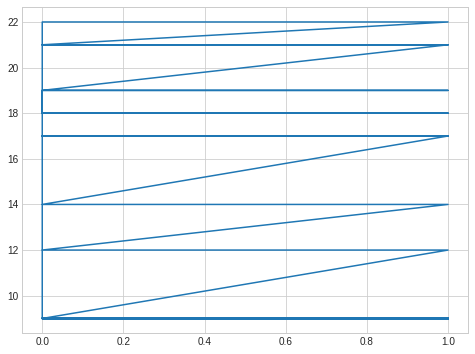

In [36]:
# Time Series Plot
plt.figure(figsize=(8,6))
# Return the cumulative sum of the elements.
# basic_df = basic_df.cumsum()
plt.plot(a_day['payload'],a_day['hour'])
plt.show()
# print(basic_df)

In [18]:
# import pandas as pd
# import matplotlib.pyplot as plt 
# import matplotlib.dates as mdates

# # df = pd.read_csv("mydataframe.csv")
# # df["timestamp"] = "2013-06-" + df["Day"].astype(str).str.zfill(2) + "-" + df["Hour"].astype(str).str.zfill(2)
# # df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%d-%H")


# fig, ax1 = plt.subplots(figsize=(10, 5))
# ax1.set(xlabel='', ylabel='Total # of trips started')
# ax1.plot(a_day["hour"])
# # ax1.plot(df["timestamp"], df.Casual, color='g')
# ax1.plot(df["timestamp"], df.Registered, color='b')

# ax1.xaxis.set(
#     major_locator=mdates.DayLocator(),
#     major_formatter=mdates.DateFormatter("\n\n%A"),
#     minor_locator=mdates.HourLocator((0, 12)),
#     minor_formatter=mdates.DateFormatter("%H"),
# )
# plt.show()